<a href="https://colab.research.google.com/github/AnnalisaGibbs/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/AnnalisaGibbsCopy_of_DS_Unit_1_Sprint_Challenge_3_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [89]:
# TODO
import pandas as pd
col_header = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16']
df = pd.read_csv('/content/crx.data', header=None, names=col_header, na_values=['?'])
print(df.shape)
df.head()

(690, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [90]:
df.isna().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [91]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
70,b,32.33,7.5,u,g,e,bb,1.585,t,f,0,t,s,420.0,0,-
71,b,34.83,4.0,u,g,d,bb,12.500,t,f,0,t,g,NaN,0,-
72,a,38.58,5.0,u,g,cc,v,13.500,t,f,0,t,g,980.0,0,-
73,b,44.25,0.5,u,g,m,v,10.750,t,f,0,f,s,400.0,0,-
74,b,44.83,7.0,y,p,c,v,1.625,f,f,0,f,g,160.0,2,-


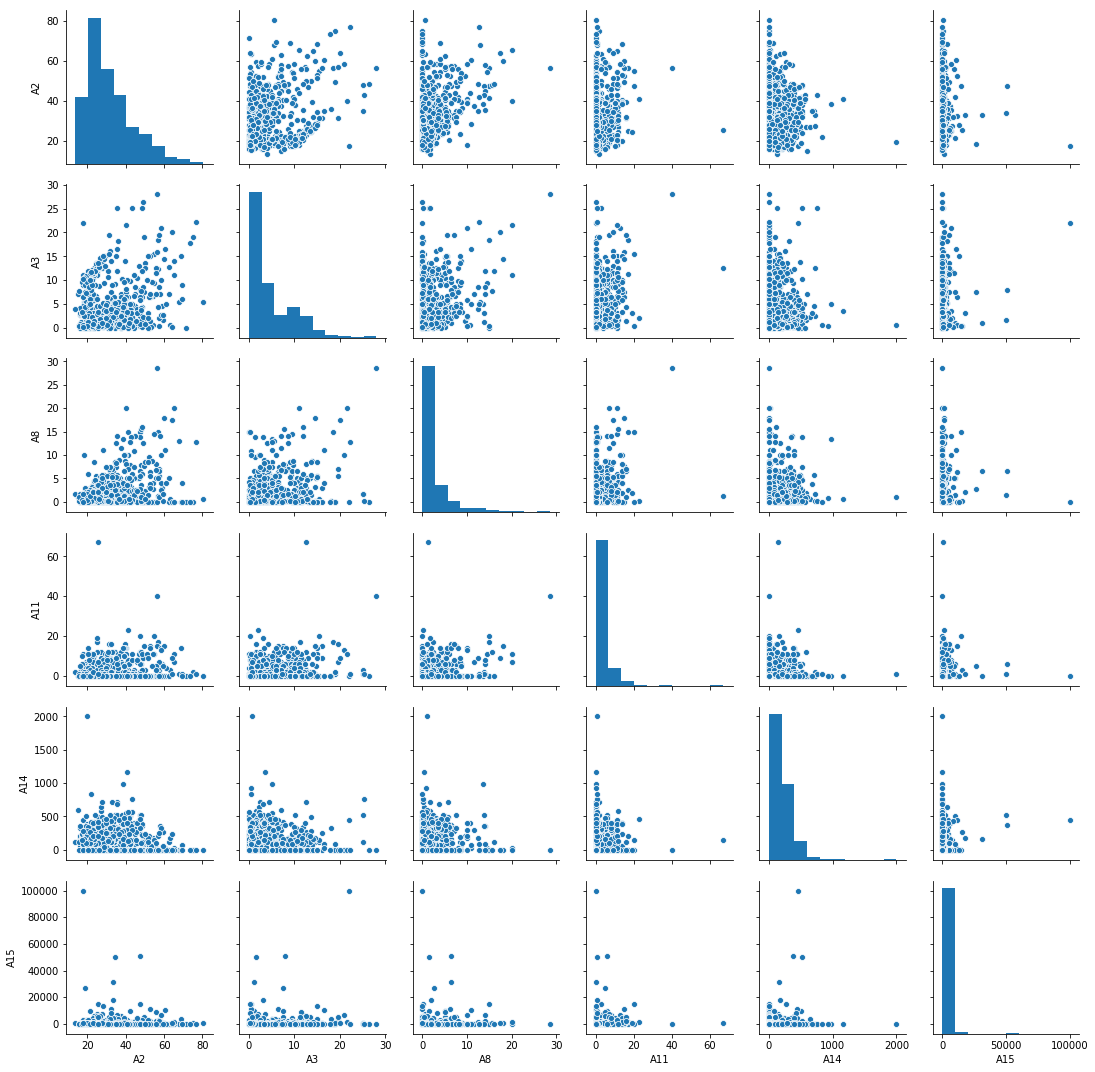

In [92]:
# TODO
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)

plus = df['A16'] == '+'
minus = df['A16'] == '-'

df_plus = df[plus]
df_minus = df[minus]

df_minus.head()


In [93]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

for sample in [df_plus['A8'],df_plus['A11']]:
  print(f'Mean: {sample.mean()}')
  print(f'StDev: {sample.std()}')
  print('----' * 10)


Mean: 3.427899022801302
StDev: 4.120792217075042
----------------------------------------
Mean: 4.605863192182411
StDev: 6.32024174432534
----------------------------------------


In [94]:
for sample in [df_minus['A8'],df_minus['A11']]:
  print(f'Mean: {sample.mean()}')
  print(f'StDev: {sample.std()}')
  print('----' * 10)


Mean: 1.2579242819843346
StDev: 2.120480642198284
----------------------------------------
Mean: 0.6318537859007833
StDev: 1.9000491753156816
----------------------------------------


In [156]:
tstat, pvalue = ttest_ind(df_plus['A8'],df_minus['A8'])
print(tstat)
print(pvalue)

8.935819983773698
3.6710537401601785e-18


In [157]:
tstat, pvalue = ttest_ind(df_plus['A11'],df_minus['A11'])
print(tstat)
print(pvalue)

11.667004222431277
7.957718568079967e-29


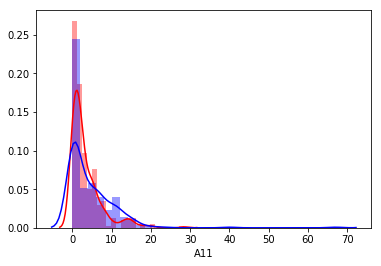

In [154]:
sns.distplot(df_plus['A8'], color='r')
sns.distplot(df_plus['A11'], color='b')


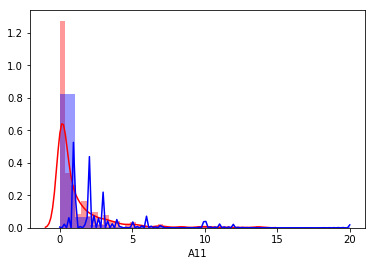

In [155]:
sns.distplot(df_minus['A8'], color='r')
sns.distplot(df_minus['A11'], color='b')


In [132]:
plus_table = pd.crosstab(df_plus['A5'], df_plus['A4'], margins=True)
plus_table                      

A4,l,u,y,All
A5,,,,
g,0,256,0,256
gg,2,0,0,2
p,0,0,45,45
All,2,256,45,303


In [149]:
temp_df = df.sort_values(by='A16')
contingency_tableA5 = pd.crosstab(temp_df['A16'], temp_df['A5'], margins=True)
contingency_tableA5


A5,g,gg,p,All
A16,,,,
+,256,2,45,303
-,263,0,118,381
All,519,2,163,684


In [141]:
contingency_tableA4 = pd.crosstab(temp_df['A16'], temp_df['A4'], margins=True)
contingency_tableA4

A4,l,u,y,All
A16,,,,
+,2,256,45,303
-,0,263,118,381
All,2,519,163,684


In [0]:
import numpy as np

# #expected = []

# #row_sums = contingency_table.iloc[:2,2].values
# col_sums = contingency_table.iloc[2, 0:3].values
# total = contingency_table.loc['All','All']

# for i in range(len(row_sums)):
#   expected_row = []
#   for column in col_sums:
#     expected_val = column*row_sums[i]/total
#     expected_row.append(expected_val)
#   expected.append(expected_row)
  
# expected = np.array(expected)
# print(expected.shape)
# print(expected)

In [150]:
observedA5 = pd.crosstab(df['A16'], df['A5']).values
print(observedA5.shape)
observedA5

(2, 3)


array([[256,   2,  45],
       [263,   0, 118]])

In [151]:
observedA4 = pd.crosstab(df['A16'], df['A4']).values
print(observedA4.shape)
observedA4

(2, 3)


array([[  2, 256,  45],
       [  0, 263, 118]])

In [0]:
# chi_square = ((observed - expected)**2/(expected)).sum()
# chi_square
# print(expected)

In [152]:
#from scipy.stats import chisquare  # One-way chi square test
import scipy.stats as stats


chi_squared, p_value, dof, expected = stats.chi2_contingency(observedA5)
print(chi_squared)
print(p_value)
print(dof)
print(expected)

26.234074966202144
2.010680204180363e-06
2
[[229.90789474   0.88596491  72.20614035]
 [289.09210526   1.11403509  90.79385965]]


In [153]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observedA4)
print(chi_squared)
print(p_value)
print(dof)
print(expected)

26.234074966202144
2.010680204180363e-06
2
[[  0.88596491 229.90789474  72.20614035]
 [  1.11403509 289.09210526  90.79385965]]


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

1. For the first t-test I ran for the plus class and found that the mean was close enough for A8 and A11 with a relatively different standard deviation.
For A8, there is a t test of 8.9
and A11 there is t test of 11.7


Plus

A8
Mean: 3.427899022801302
StDev: 4.120792217075042
----------------------------------------

A11
Mean: 4.605863192182411
StDev: 6.32024174432534
----------------------------------------

For the minus t-test

Minus

A8
Mean: 1.2579242819843346
StDev: 2.120480642198284
----------------------------------------

A11
Mean: 0.6318537859007833
StDev: 1.9000491753156816
----------------------------------------





Both Chi squared numbers where very low. The variable seems indenpendent of each other. We can fail to reject the null hypothesis because the p value is greater than 2. 
There seems to be no relationship between the 2 categoral features that I picked, which is A4 and A5.


*italicized text*

In [0]:
Not knowing the relationships was hard.
figuring out how to filter the minus and plus was hard for me to. 
Also, understanding the t test result was difficult without knowing what the features were.